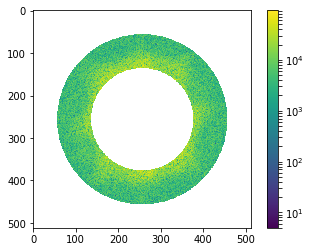

In [9]:
%matplotlib inline
from PIL import Image
import os 

import math
import numpy as np
import matplotlib.pyplot as plt

import ao_with_fft as ao
import numpy as np
from scipy import misc, fftpack, ndimage
from scipy.sparse import lil_matrix



shape of feq array is  (11, 8)
WORKED
(11, 8)


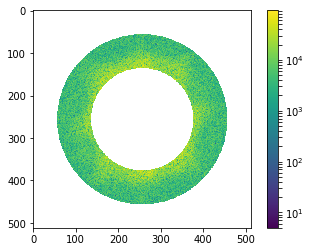

In [10]:
############
freq=ao.av_freq()
intensity=ao.av_intensity()
print("shape of feq array is ",np.shape(freq))


#radius = 256
#cut = 200

#out_mask = ao.MakeMask(radius,cut)
#in_mask = (ao.MakeMask(radius, cut*0.6))
#ring_mask = out_mask*((in_mask-1)*-1)
#fft2 = fftpack.fft2(imarray)

#print(freq)
print("WORKED")
frequency=np.asarray(freq)
print(frequency.shape)


[ 3  4  5  6  7  8  9 10 11 12 13]
[ 0  4  8 12 16 20 24 28]
[[1538.02403058 1763.94338745 2183.29726092 3193.03548625 4178.75719265
  3732.80618551 2519.90833182 1897.6506897 ]
 [1866.14968527 2170.43923746 2660.34752771 3387.60345069 4039.56758636
  3779.23785822 2876.84269643 2146.69868725]
 [1911.83006023 2137.94077405 2461.28604991 3314.66667491 3969.08439273
  3229.25812034 2299.4035445  1904.48461026]
 [2187.32878851 2416.8514189  3127.97650643 3879.12033237 3923.02736778
  3339.06954981 2704.62229286 2385.17777081]
 [2094.8325348  2357.90006673 3269.34212595 3988.08364131 3823.94145015
  3150.12692653 2524.67746807 2140.37075712]
 [2101.02474541 2223.23519    2486.07983045 3054.7743693  3491.38782079
  3383.33741717 2848.04683135 2399.01050018]
 [2021.33349789 2351.09028473 2777.55548709 3211.57309313 3531.75067851
  3470.67008899 2971.73789415 2445.23493025]
 [1886.68034364 2275.49081338 3127.63523499 3986.22390444 3961.13630395
  3085.3267187  2450.51088449 2134.97554277]
 [2

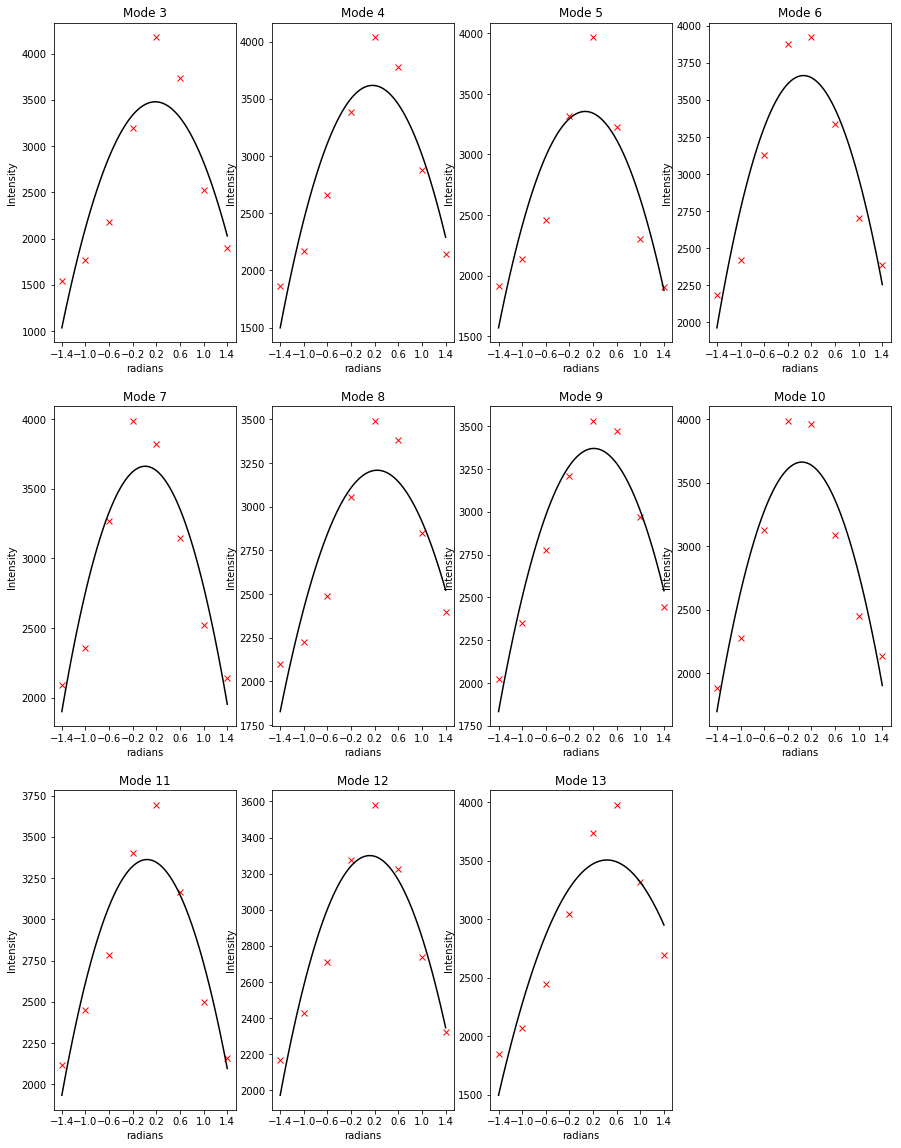

11
[-1.4 -1.  -0.6 -0.2  0.2  0.6  1.   1.4]
[[1538.02403058 1763.94338745 2183.29726092 3193.03548625 4178.75719265
  3732.80618551 2519.90833182 1897.6506897 ]
 [1866.14968527 2170.43923746 2660.34752771 3387.60345069 4039.56758636
  3779.23785822 2876.84269643 2146.69868725]
 [1911.83006023 2137.94077405 2461.28604991 3314.66667491 3969.08439273
  3229.25812034 2299.4035445  1904.48461026]
 [2187.32878851 2416.8514189  3127.97650643 3879.12033237 3923.02736778
  3339.06954981 2704.62229286 2385.17777081]
 [2094.8325348  2357.90006673 3269.34212595 3988.08364131 3823.94145015
  3150.12692653 2524.67746807 2140.37075712]
 [2101.02474541 2223.23519    2486.07983045 3054.7743693  3491.38782079
  3383.33741717 2848.04683135 2399.01050018]
 [2021.33349789 2351.09028473 2777.55548709 3211.57309313 3531.75067851
  3470.67008899 2971.73789415 2445.23493025]
 [1886.68034364 2275.49081338 3127.63523499 3986.22390444 3961.13630395
  3085.3267187  2450.51088449 2134.97554277]
 [2118.25612034 244

In [11]:
################
#define some input valus
mode=np.arange(3,13+1,1)
print(mode)
rad=np.arange(0,28+4,4)
print(rad)
#currMode=mode[0]

vals=frequency
print(frequency)
###############
#plt.hist(imarray, bins=10); plt.show()
xrange=np.linspace(-1.4,1.4,len(rad))
xrange2=np.linspace(-1.4,1.4,100)
#print(xrange2)
fig, ax=plt.subplots(figsize=(15, 20))
for i in range(len(mode)):
    plt.subplot(3,4,i+1)
    #print(range(len(rad)))
    #plt.imshow(

    ## fit quadratic polynomial function
    fitquad=np.polyfit(xrange,vals[i][:],2)
    p=np.poly1d(fitquad)
    plt.plot(xrange,vals[i][:],'rx',xrange2,p(xrange2),'k')#)
    #plt.plot(np.polyfit(xrange,vals[i][:],3))
    plt.title('Mode %d' %(mode[i]))
    plt.xticks(xrange)
    plt.xlabel('radians')
    plt.ylabel('Intensity')
plt.show()


print(len(mode))
print(np.linspace(-1.4,1.4,8))
print(vals)
# get top 5% and then get the bins of range 5%

In [ ]:
################
mode=np.arange(3,13+1,1)
print(mode)
rad=np.arange(0,28+4,4)
print(rad)
#currMode=mode[0]

#################################################################
## Get plots

# Upper quartile
print(len(mode))
print(len(rad))
vals=np.zeros((len(mode),len(rad)))
#print(vals)
#Load images
for j in range(len(mode)):
    for i in range(len(rad)):
        if (i<3) and (j<7):
            fileDir='Images/beads  %s  %s.tiff' %(str(mode[j]), str(rad[i]))
        elif i>=3 and j<7:
            fileDir='Images/beads  %s %s.tiff' %(str(mode[j]), str(rad[i]))
        elif i>=3 and j>=7:
            fileDir='Images/beads %s %s.tiff' %(str(mode[j]), str(rad[i]))
        else:
            fileDir='Images/beads %s  %s.tiff' %(str(mode[j]), str(rad[i]))

        #print(fileDir)

        image = Image.open(fileDir)
        imarray=np.asarray(image)
        #print(imarray.shape)
        #plt.imshow(image,cmap='gray')
        #label_image = io.imread("./images/label-img.png")

        imvals=imarray.ravel()
        imvals=np.sort(imvals)[::-1]
        #print(imvals)

        # Upper 25% intensity values
        count=0.1*len(imvals) #0.01 0.25 0.005 0.5 0.0025 10%, 1% similar results
        count=round(count)
        #print(len(imarray.ravel()))
        #print(len(imvals[0:count+1]))
        #print(imvals[0:count+1])
        quantile=imvals[0:count+1]
        #print(quantile.mean())
        vals[j][i]=quantile.mean()


#print(vals)
#print(vals[0][:])

#plt.hist(imarray, bins=10); plt.show()
xrange=np.linspace(-1.4,1.4,len(rad))
xrange2=np.linspace(-1.4,1.4,100)
#print(xrange2)
fig, ax=plt.subplots(figsize=(15, 20))
for i in range(len(mode)):
    plt.subplot(3,4,i+1)
    #print(range(len(rad)))
    #plt.imshow(

    ## fit quadratic polynomial function
    fitquad=np.polyfit(xrange,vals[i][:],2)
    p=np.poly1d(fitquad)
    plt.plot(xrange,vals[i][:],'rx',xrange2,p(xrange2),'k')#)
    #plt.plot(np.polyfit(xrange,vals[i][:],3))
    plt.title('Mode %d' %(mode[i]))
    plt.xticks(xrange)
    plt.xlabel('radians')
    plt.ylabel('Intensity')
plt.show()


print(len(mode))
print(np.linspace(-1.4,1.4,8))
print(vals)
# get top 5% and then get the bins of range 5%


